# Fraud Detection in Insurance Claims - Group 17

In [1]:
#Importing the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
#Creating a Dataframe for our Dataset
df = pd.read_csv('/Users/gavindsa/Downloads/Insurance_claims (2).csv')

# Data Exploration

In [3]:
df.head()

months_as_customer  age  policy_number     policy_bind_date policy_state  \
0                 328   48         521585  2014-10-17 00:00:00           OH   
1                 228   42         342868  2006-06-27 00:00:00           IN   
2                 134   29         687698  2000-09-06 00:00:00           OH   
3                 256   41         227811  1990-05-25 00:00:00           IL   
4                 228   44         367455  2014-06-06 00:00:00           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [4]:
#Replacing the '?' with 'NaN' values.
df.replace('?', np.nan, inplace = True)

In [5]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
#Finding the number of nulls
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

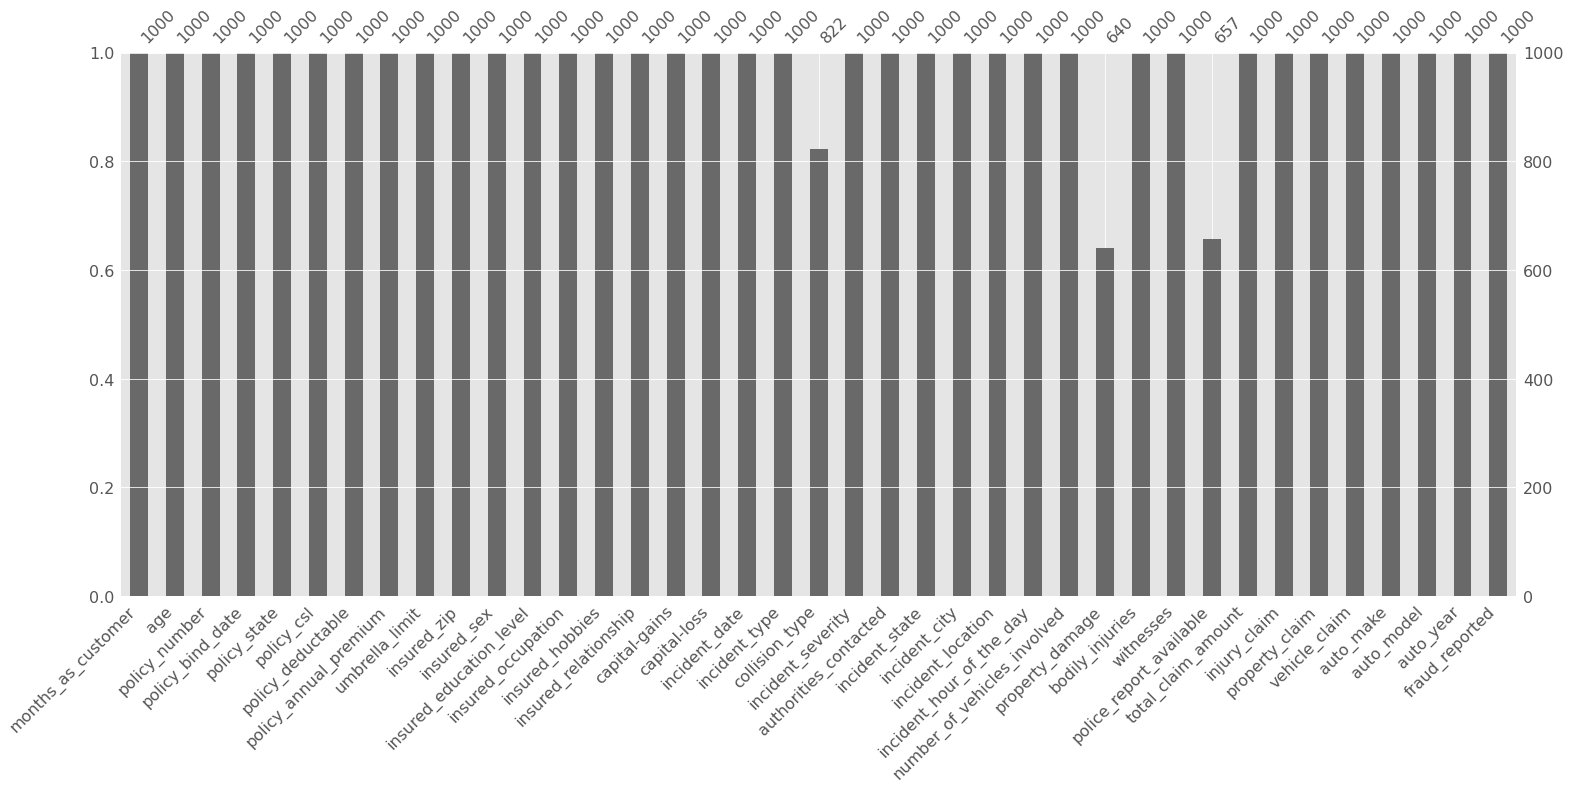

In [8]:
#Plotting the missing values
import missingno as msno

msno.bar(df)
plt.show()

In [9]:
#Replacing the nulls with their respective mode values
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [10]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [11]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [12]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

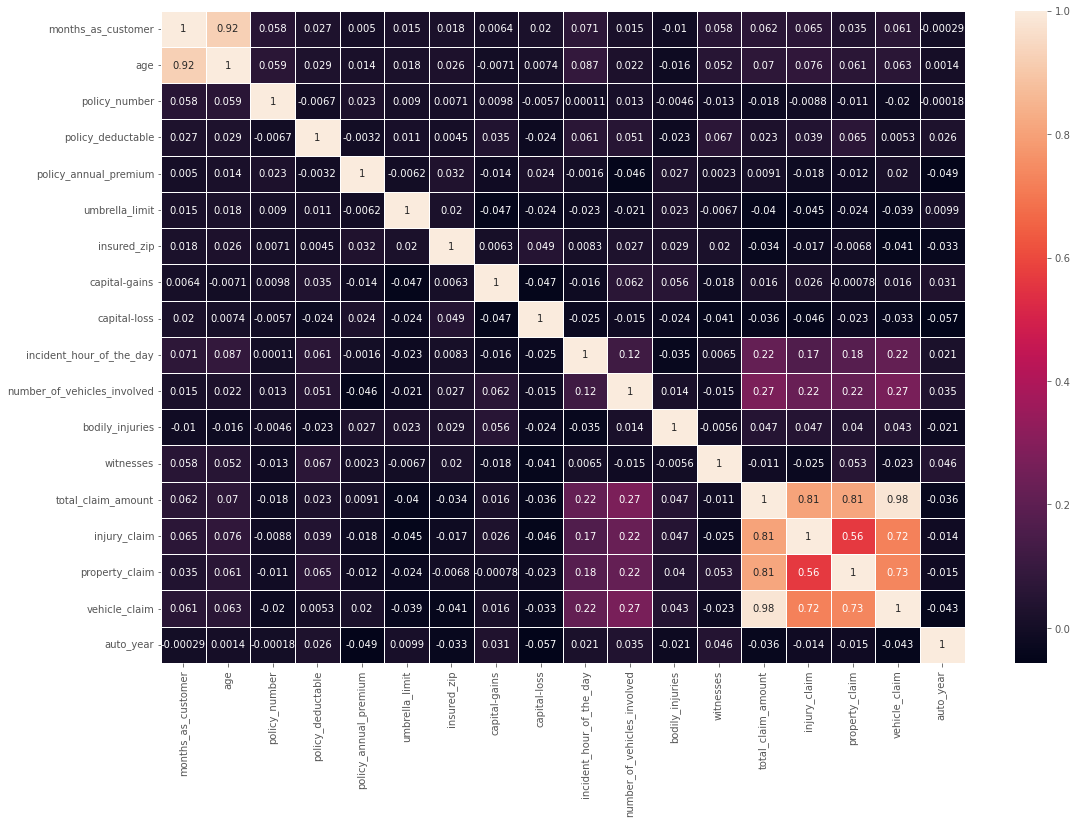

In [13]:
#Correlation plot
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [14]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [15]:
#Dropping the following variables.
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)

In [16]:
df.head()

months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  ...  number_of_vehicles_involved  \
0       craft-repair              husband  ...                            1   
1  machine-op-inspct       other-relative  ...                            1   
2              sales            own-child  ...                            3   
3       armed-forces            unmarried  ...                            1   
4              sales            unmarried  ...                            1   

   property_damage bodily_injuries witnesses police_report_available  \
0              YES               1         2                     YES   
1               NO               0         0                      NO   
2               NO               2         3                      NO   
3               NO               1         2                      NO   
4               NO               0         1                      NO   

  total_claim_amount  injury_claim  property_claim vehicle_claim  \
0              71610          6510           13020         52080   
1               5070           780             780          3510   
2              34650          7700            3850         23100   
3              63400          6340            6340         50720   
4               6500          1300             650          4550   

   fraud_reported  
0               Y  
1               Y  
2               N  
3               Y  
4               N  

[5 rows x 27 columns]

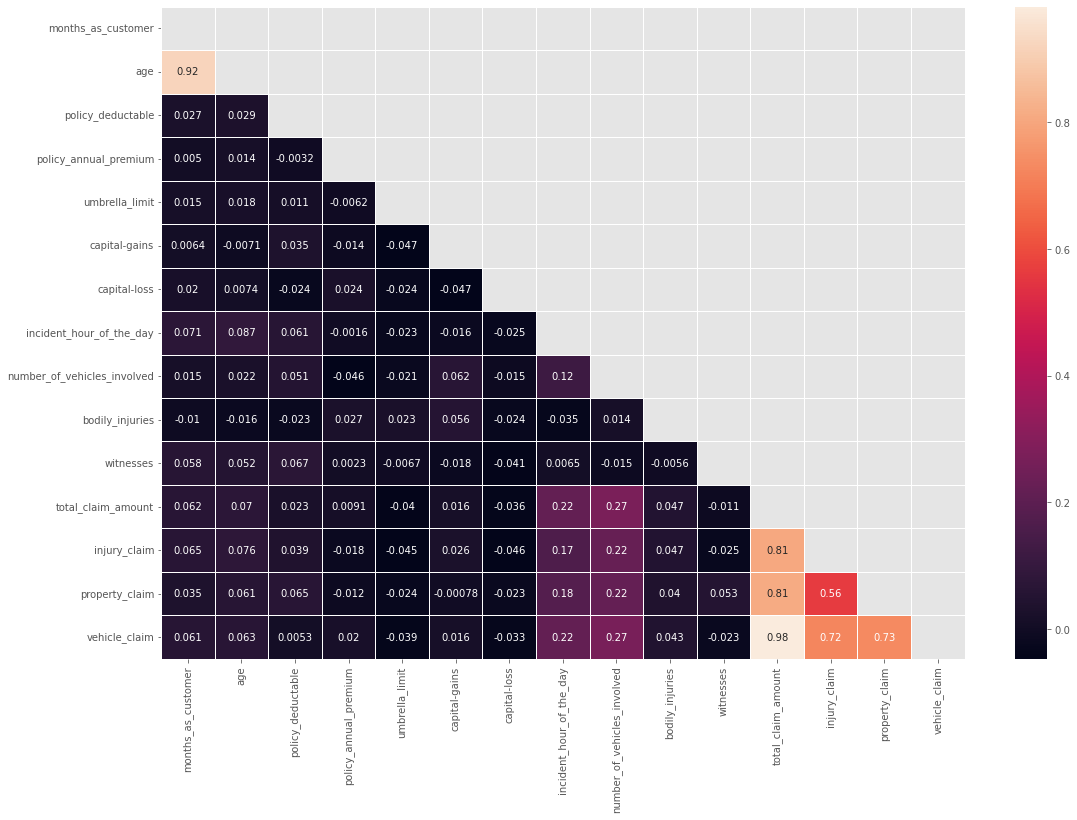

In [17]:
plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [18]:
#From this plot we can see that months_as_customers and age are highly correlated, so we can drop the ‘Age’ column. 

#Similarly, even total_clam_amount, injury_claim, property_claim, vehicle_claim are highly correlated and total claim is the sum of the other claims. Hence we can drop that column too.

df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [19]:
df.head()

months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_relationship  capital-gains  ...  incident_hour_of_the_day  \
0              husband          53300  ...                         5   
1       other-relative              0  ...                         8   
2            own-child          35100  ...                         7   
3            unmarried          48900  ...                         5   
4            unmarried          66000  ...                        20   

  number_of_vehicles_involved property_damage bodily_injuries witnesses  \
0                           1             YES               1         2   
1                           1              NO               0         0   
2                           3              NO               2         3   
3                           1              NO               1         2   
4                           1              NO               0         1   

   police_report_available  injury_claim property_claim  vehicle_claim  \
0                      YES          6510          13020          52080   
1                       NO           780            780           3510   
2                       NO          7700           3850          23100   
3                       NO          6340           6340          50720   
4                       NO          1300            650           4550   

   fraud_reported  
0               Y  
1               Y  
2               N  
3               Y  
4               N  

[5 rows x 25 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

# Data Mining Tasks

In [21]:
#Selecting fraud_reported as our target variable.
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [22]:
cat_df = X.select_dtypes(include = ['object'])

In [23]:
cat_df.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_relationship             incident_type   collision_type  \
0              husband  Single Vehicle Collision   Side Collision   
1       other-relative             Vehicle Theft   Rear Collision   
2            own-child   Multi-vehicle Collision   Rear Collision   
3            unmarried  Single Vehicle Collision  Front Collision   
4            unmarried             Vehicle Theft   Rear Collision   

  incident_severity authorities_contacted property_damage  \
0      Major Damage                Police             YES   
1      Minor Damage                Police              NO   
2      Minor Damage                Police              NO   
3      Major Damage                Police              NO   
4      Minor Damage                  None              NO   

  police_report_available  
0                     YES  
1                      NO  
2                      NO  
3                      NO  
4                      NO

In [24]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [25]:
#Replacing categorical values with dummies.
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [26]:
cat_df.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  ...  collision_type_Side Collision  \
0                                0  ...                              1   
1                                0  ...                              0   
2                                0  ...                              0   
3                                1  ...                              0   
4                                0  ...                              0   

   incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             0   
1                               1                             0   
2                               1                             0   
3                               0                             0   
4                               1                             0   

   incident_severity_Trivial Damage  authorities_contacted_Fire  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   authorities_contacted_None  authorities_contacted_Other  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           1                            0   

   authorities_contacted_Police  property_damage_YES  \
0                             1                    1   
1                             1                    0   
2                             1                    0   
3                             1                    0   
4                             0                    0   

   police_report_available_YES  
0                            1  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 41 columns]

In [27]:
num_df = X.select_dtypes(include = ['int64'])

In [28]:
num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
0                1          2          6510           13020          52080  
1                0          0           780             780           3510  
2                2          3          7700            3850          23100  
3                1          2          6340            6340          50720  
4                0          1          1300             650           4550

In [29]:
X = pd.concat([num_df, cat_df], axis = 1)

In [30]:
X.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  ...  \
0                1          2          6510  ...   
1                0          0           780  ...   
2                2          3          7700  ...   
3                1          2          6340  ...   
4                0          1          1300  ...   

   collision_type_Side Collision  incident_severity_Minor Damage  \
0                              1                               0   
1                              0                               1   
2                              0                               1   
3                              0                               0   
4                              0                               1   

   incident_severity_Total Loss  incident_severity_Trivial Damage  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   authorities_contacted_Fire  authorities_contacted_None  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   authorities_contacted_Other  authorities_contacted_Police  \
0                            0                             1   
1                            0                             1   
2                            0                             1   
3                            0                             1   
4                            0                             0   

   property_damage_YES  police_report_available_YES  
0                    1                            1  
1                    0                            0  
2                    0                            0  
3                    0                            0  
4                    0                            0  

[5 rows x 53 columns]

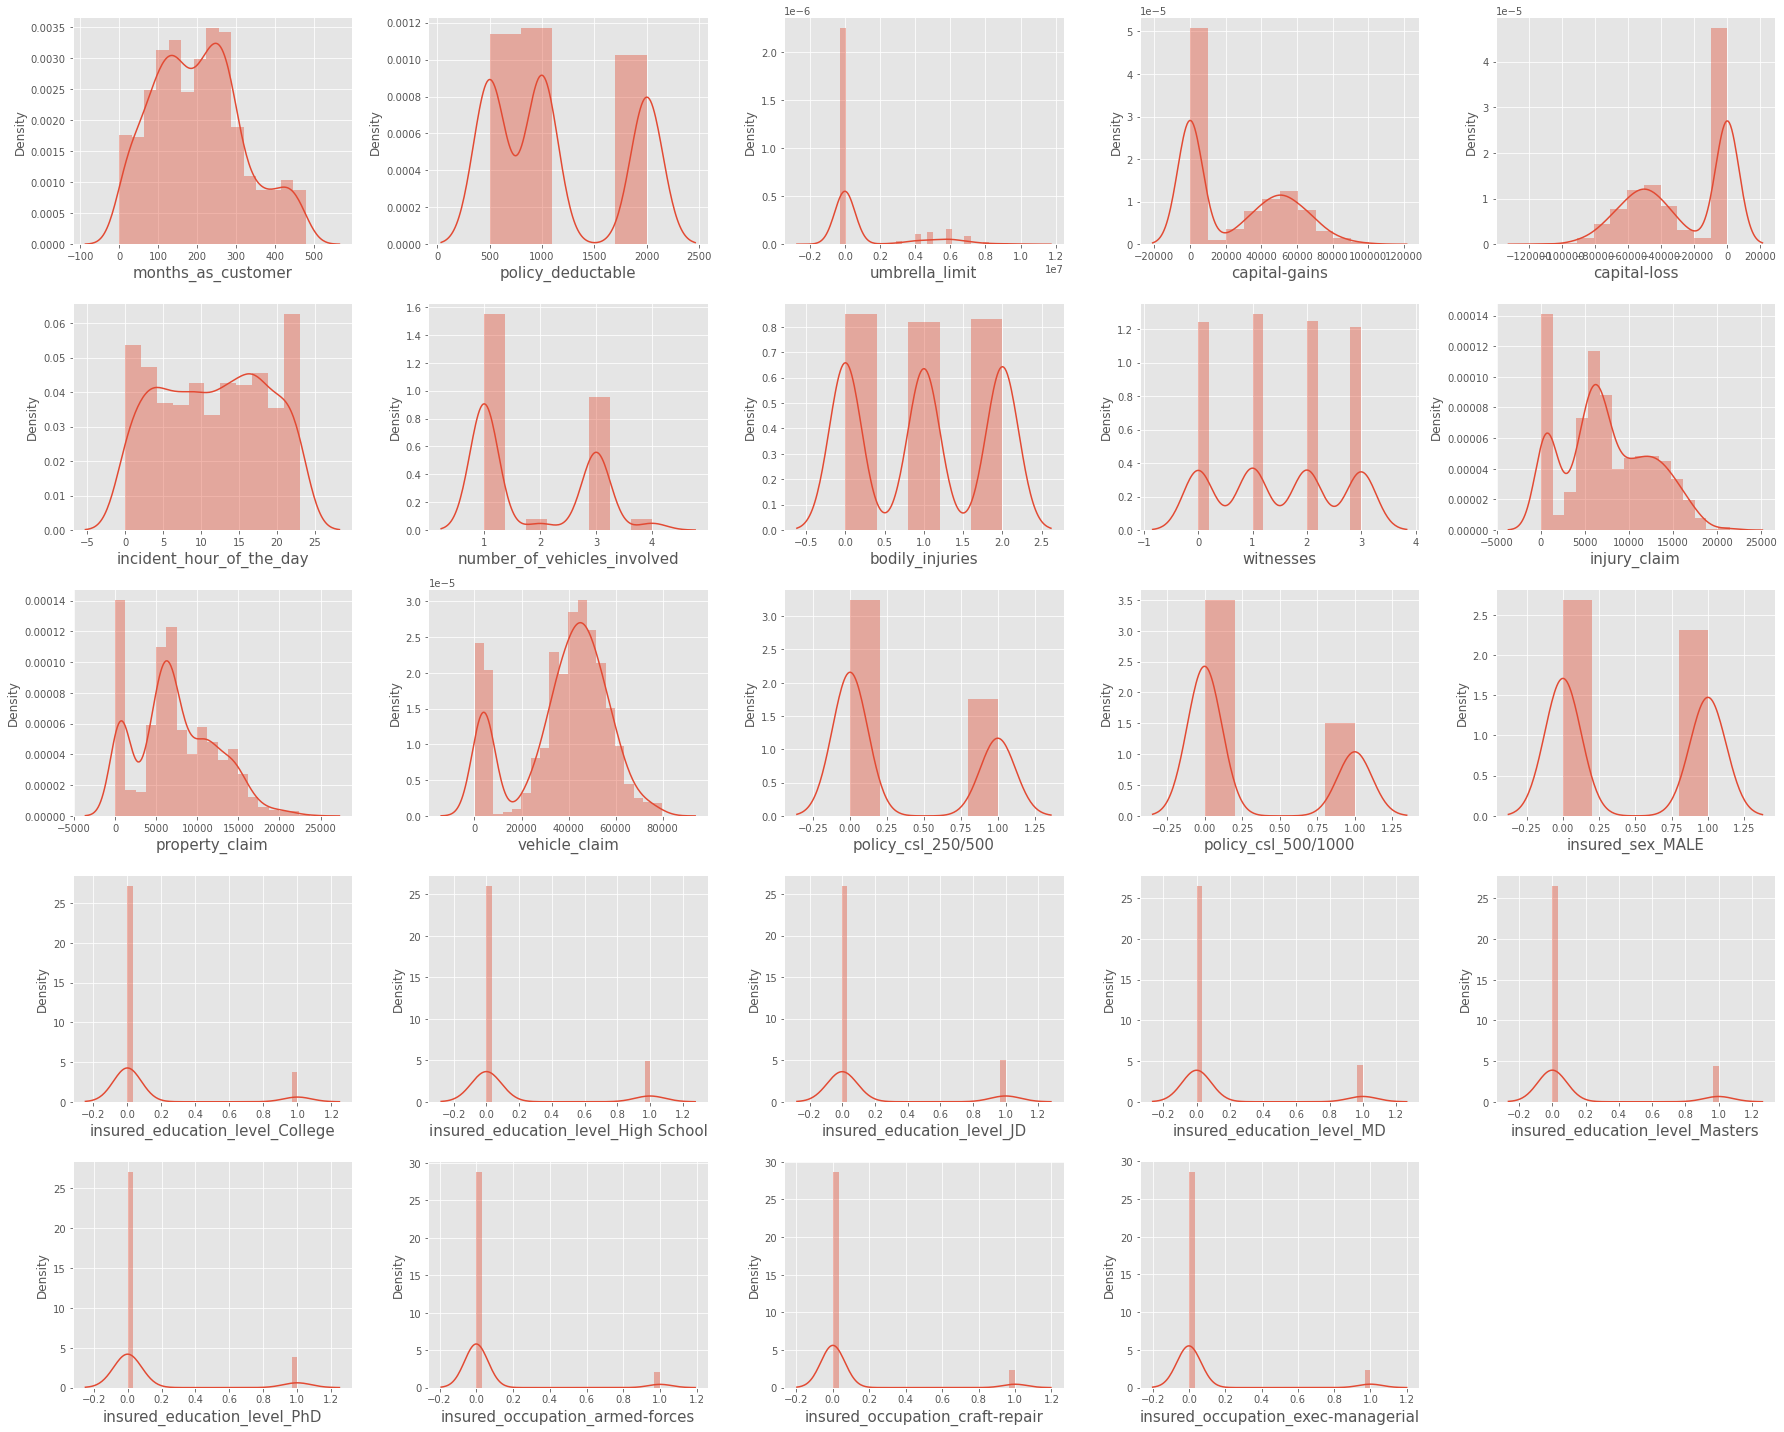

In [31]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

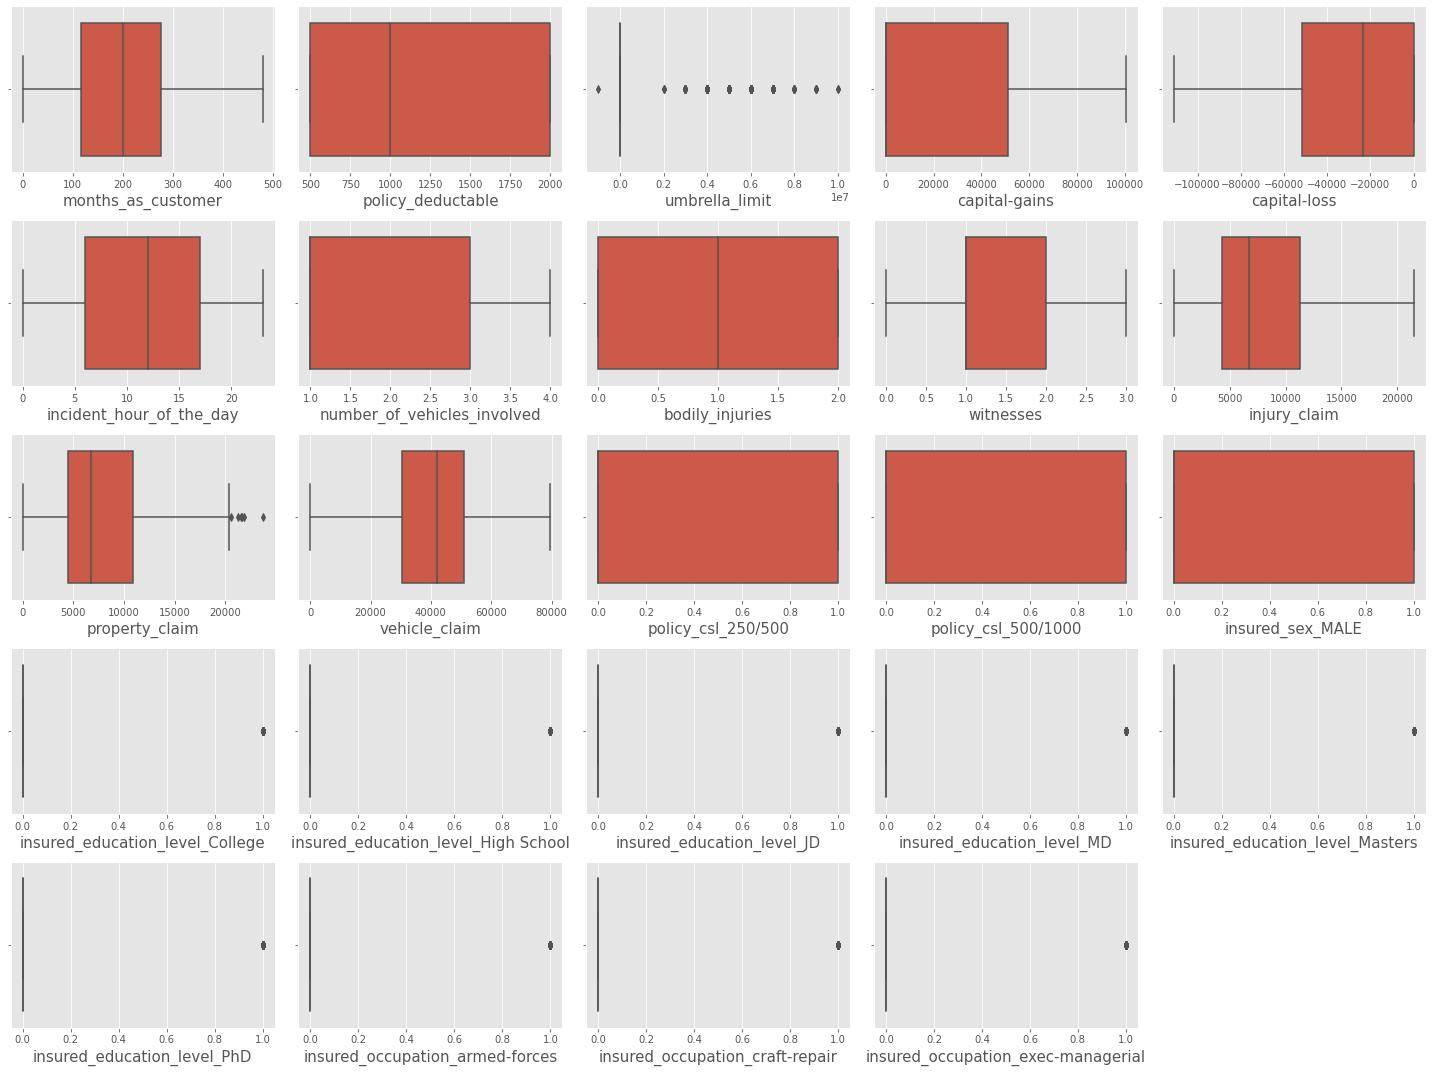

In [32]:
#Looking for outliers using the following plot.
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

# Data Mining Models

In [33]:
#Splitting our data into 75% for training and 25% for testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [34]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
676                  32                500               0              0   
936                 204               1000         7000000          44000   
896                 246                500               0              0   
935                 154               1000               0          53100   
221                 298                500               0          47800   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
676        -45700                        11                            3   
936        -20800                         6                            1   
896             0                        13                            1   
935        -43900                        18                            4   
221             0                        17                            1   

     bodily_injuries  witnesses  injury_claim  ...  \
676                2          0         10540  ...   
936                1          0          5340  ...   
896                0          3           660  ...   
935                2          3         13520  ...   
221                2          2          2810  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
676                              0                               1   
936                              0                               1   
896                              0                               0   
935                              1                               0   
221                              0                               1   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
676                             0                                 0   
936                             0                                 0   
896                             0                                 1   
935                             1                                 0   
221                             0                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
676                           0                           0   
936                           0                           0   
896                           0                           1   
935                           0                           0   
221                           0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
676                            0                             0   
936                            0                             1   
896                            0                             0   
935                            1                             0   
221                            0                             0   

     property_damage_YES  police_report_available_YES  
676                    1                            0  
936                    0                            0  
896                    0                            1  
935                    0                            1  
221                    0                            0  

[5 rows x 53 columns]

In [35]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [36]:
#Standardizing our data and scaling it.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [37]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
676           -1.549099          -1.025393       -0.479188      -0.890143   
936           -0.036284          -0.213308        2.630497       0.694348   
896            0.333124          -1.025393       -0.479188      -0.890143   
935           -0.476056          -0.213308       -0.479188       1.022049   
221            0.790487          -1.025393       -0.479188       0.831190   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
676     -0.678153                 -0.109957                     1.082310   
936      0.211015                 -0.824582                    -0.866628   
896      0.953773                  0.175893                    -0.866628   
935     -0.613876                  0.890518                     2.056779   
221      0.953773                  0.747593                    -0.866628   

     bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
676         1.220293  -1.365347      0.646997       -0.456360       0.221862  
936         0.001625  -1.365347     -0.428926       -0.441905       0.251681  
896        -1.217043   1.327055     -1.397257       -1.272035      -1.741927  
935         1.220293   1.327055      1.263583        1.247266       0.496622  
221         1.220293   0.429588     -0.952404       -0.384085      -0.975687

In [38]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [39]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [40]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
676           -1.549099          -1.025393       -0.479188      -0.890143   
936           -0.036284          -0.213308        2.630497       0.694348   
896            0.333124          -1.025393       -0.479188      -0.890143   
935           -0.476056          -0.213308       -0.479188       1.022049   
221            0.790487          -1.025393       -0.479188       0.831190   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
676     -0.678153                 -0.109957                     1.082310   
936      0.211015                 -0.824582                    -0.866628   
896      0.953773                  0.175893                    -0.866628   
935     -0.613876                  0.890518                     2.056779   
221      0.953773                  0.747593                    -0.866628   

     bodily_injuries  witnesses  injury_claim  ...  \
676         1.220293  -1.365347      0.646997  ...   
936         0.001625  -1.365347     -0.428926  ...   
896        -1.217043   1.327055     -1.397257  ...   
935         1.220293   1.327055      1.263583  ...   
221         1.220293   0.429588     -0.952404  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
676                              0                               1   
936                              0                               1   
896                              0                               0   
935                              1                               0   
221                              0                               1   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
676                             0                                 0   
936                             0                                 0   
896                             0                                 1   
935                             1                                 0   
221                             0                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
676                           0                           0   
936                           0                           0   
896                           0                           1   
935                           0                           0   
221                           0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
676                            0                             0   
936                            0                             1   
896                            0                             0   
935                            1                             0   
221                            0                             0   

     property_damage_YES  police_report_available_YES  
676                    1                            0  
936                    0                            0  
896                    0                            1  
935                    0                            1  
221                    0                            0  

[5 rows x 53 columns]

# Support Vector Machine

In [41]:
#Using the Support Vector Machine Classifier.
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of the Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of the Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of the Support Vector Classifier is : 0.8293333333333334
Test accuracy of the Support Vector Classifier is : 0.752
[[188   0]
 [ 62   0]]
              precision    recall  f1-score   support

           N       0.75      1.00      0.86       188
           Y       0.00      0.00      0.00        62

    accuracy                           0.75       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.75      0.65       250



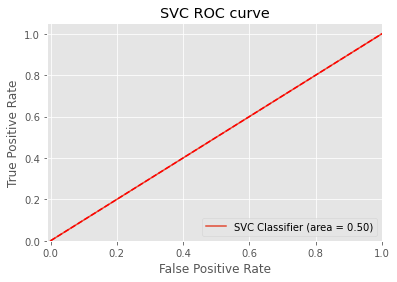

In [43]:
#Plotting the ROC curve for SVC.
ss=pd.DataFrame(y_pred)
ss.replace(('Y', 'N'), (1, 0), inplace=True)

pp=pd.DataFrame(y_test)
pp.replace(('Y', 'N'), (1, 0), inplace=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds = roc_curve(pp, svc.predict_proba(X_test)[:,1])
SVC_roc_auc = roc_auc_score(y_test,svc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr1, tpr1, label='SVC Classifier (area = %0.2f)' % SVC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("SVC ROC curve")
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbors

In [44]:
#Using the K-Nearest Neighbors algorithm.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7546666666666667
Test accuracy of KNN is : 0.752
[[188   0]
 [ 62   0]]
              precision    recall  f1-score   support

           N       0.75      1.00      0.86       188
           Y       0.00      0.00      0.00        62

    accuracy                           0.75       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.75      0.65       250



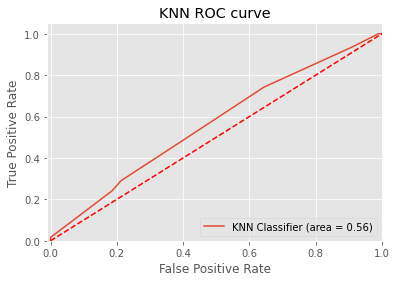

In [46]:
#Plotting the ROC curve for KNN.
ss=pd.DataFrame(y_pred)
ss.replace(('Y', 'N'), (1, 0), inplace=True)

pp=pd.DataFrame(y_test)
pp.replace(('Y', 'N'), (1, 0), inplace=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds = roc_curve(pp, knn.predict_proba(X_test)[:,1])
KNN_roc_auc = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr2, tpr2, label='KNN Classifier (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("KNN ROC curve")
plt.legend(loc="lower right")
plt.show()

# Decision Tree Classifier

In [47]:
#Using the Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of the Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of the Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of the Decision Tree is : 1.0
Test accuracy of the Decision Tree is : 0.624
[[129  59]
 [ 35  27]]
              precision    recall  f1-score   support

           N       0.79      0.69      0.73       188
           Y       0.31      0.44      0.36        62

    accuracy                           0.62       250
   macro avg       0.55      0.56      0.55       250
weighted avg       0.67      0.62      0.64       250



# Hyper Parameter Tuning

In [49]:
#Using Grid Search for hyper parameter tuning.
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [50]:
#Using the best parameters.
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8026666666666668


In [51]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of the Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of the Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of the Decision Tree is : 0.808
Test accuracy of the Decision Tree is : 0.82
[[158  30]
 [ 15  47]]
              precision    recall  f1-score   support

           N       0.91      0.84      0.88       188
           Y       0.61      0.76      0.68        62

    accuracy                           0.82       250
   macro avg       0.76      0.80      0.78       250
weighted avg       0.84      0.82      0.83       250



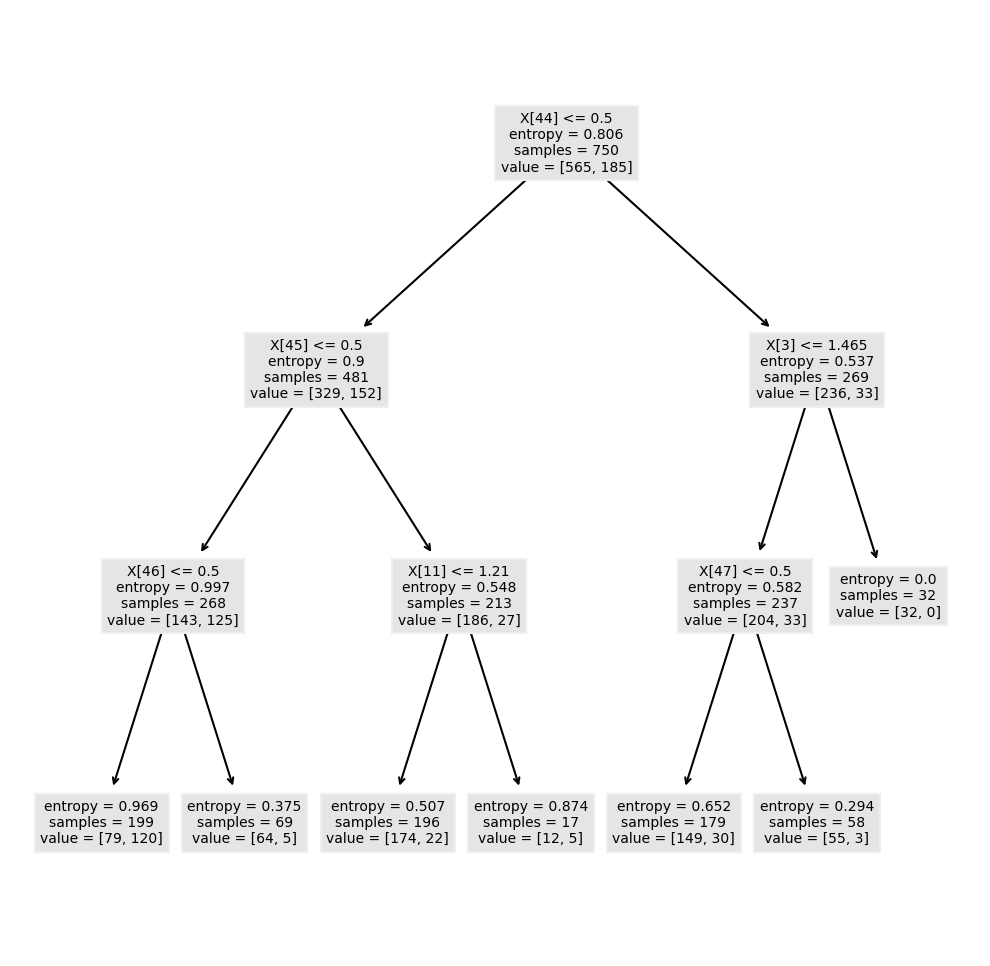

In [53]:
#Plotting the Decision Tree.
from sklearn import datasets
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc)
fig.show()

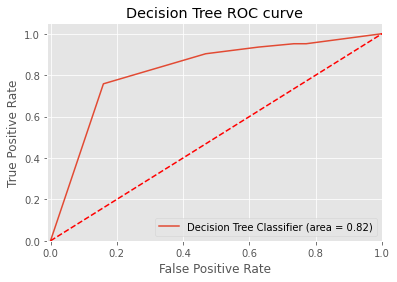

In [54]:
#Plotting the Decision Tree ROC curve.
ss=pd.DataFrame(y_pred)
ss.replace(('Y', 'N'), (1, 0), inplace=True)

pp=pd.DataFrame(y_test)
pp.replace(('Y', 'N'), (1, 0), inplace=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr3, tpr3, thresholds = roc_curve(pp, dtc.predict_proba(X_test)[:,1])
Decision_roc_auc = roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr3, tpr3, label='Decision Tree Classifier (area = %0.2f)' % Decision_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree ROC curve")
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier

In [55]:
#Using the Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of the Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of the Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of the Random Forest is : 0.956
Test accuracy of the Random Forest is : 0.768
[[186   2]
 [ 56   6]]
              precision    recall  f1-score   support

           N       0.77      0.99      0.87       188
           Y       0.75      0.10      0.17        62

    accuracy                           0.77       250
   macro avg       0.76      0.54      0.52       250
weighted avg       0.76      0.77      0.69       250



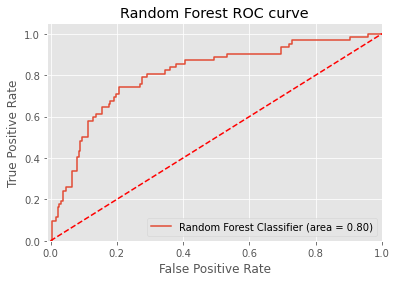

In [57]:
#Plotting the ROC curve for Random Forest Classifier.
ss=pd.DataFrame(y_pred)
ss.replace(('Y', 'N'), (1, 0), inplace=True)

pp=pd.DataFrame(y_test)
pp.replace(('Y', 'N'), (1, 0), inplace=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr4, tpr4, thresholds = roc_curve(pp, rand_clf.predict_proba(X_test)[:,1])
randf_roc_auc = roc_auc_score(y_test,rand_clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr4, tpr4, label='Random Forest Classifier (area = %0.2f)' % randf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest ROC curve")
plt.legend(loc="lower right")
plt.show()

# Performance Evaluation

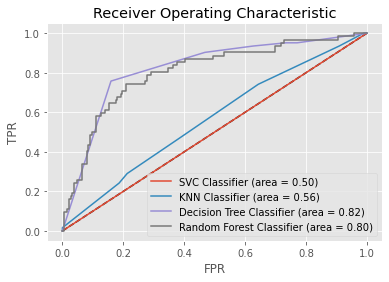

In [58]:
#Plotting all the ROC curves together in order to compare the models.
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label='SVC Classifier (area = %0.2f)' % SVC_roc_auc)
plt.plot(fpr2, tpr2, label='KNN Classifier (area = %0.2f)' % KNN_roc_auc)
plt.plot(fpr3, tpr3, label='Decision Tree Classifier (area = %0.2f)' % Decision_roc_auc)
plt.plot(fpr4, tpr4, label='Random Forest Classifier (area = %0.2f)' % randf_roc_auc)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [59]:
#Making a dataframe to compare model accuracy values.
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model  Score
2  Decision Tree  0.820
3  Random Forest  0.768
0            SVC  0.752
1            KNN  0.752

In [60]:
#Plotting model accuracy.
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score',
       title = 'Models Comparison')